- bold: **bold**
- italic: _italic_
- blockquotes: 
> "In a few moments he was barefoot, his stockings folded in his pockets and his
  canvas shoes dangling by their knotted laces over his shoulders and, picking a
  pointed salt-eaten stick out of the jetsam among the rocks, he clambered down
  the slope of the breakwater."
 <br/>dsadsadsa
 <br>
   
### [Table generator](https://www.tablesgenerator.com/markdown_tables#)
## [markdown tutorial](https://www.markdowntutorial.com/lesson/1/)

<a id='0'></a>
## [2. Linear Regression](#ch2)
</br>

2. [Simple linear regression](#1)
2. [Evaluating the fitness of a model with a cost function](#2)
2. [Solving ordinary least squares for simple linear regression](#3)
2. [Multiple linear regression](#4)
2. [Polynomial regression](#5)
2. [Regularization](#6)
2. [Applying linear regression](#7)
2. [Fitting and evaluating the model](#8)
2. [Fitting models with gradient descent](#9)

## [3. Feature extraction and preprocessing](#ch3)

3. [Extracting features from categorical variables](#3.1)
3. [Extracting features from text](#3.2)

## [4. Logistic Regression](#ch4)
4. [Binary classification](#4.1)
4. [ROC (Receiver operating characteristic)](#roc)

[markdown syntax](http://commonmark.org/help/tutorial/05-blockquotes.html)

<a id='ch2'></a>

## [2. Linear Regression](#0)


<a id='1'> </a>
### [Simple linear regression](#0)


The <font color='blue'> sklearn.linear_model.LinearRegression </font> class is an estimator. Estimators
predict a value based on the observed data. In scikit-learn, all estimators implement
the fit() and predict() methods. The former method is used to learn the parameters
of a model, and the latter method is used to predict the value of a response variable
for an explanatory variable using the learned parameters. It is easy to experiment
with different models using scikit-learn because all estimators implement the fit and
predict methods.
The fit method of LinearRegression learns the parameters of the following model
for simple linear regression:
</br>

## $$  y =\alpha + \beta * x  $$
</br>


</br>
Let's model the relationship between the size of a pizza and its price. First,
we will write a program with scikit-learn that can predict the price of a pizza given
its size. Then, we will discuss how simple linear regression works and how it can
be generalized to work with other types of problems. Let's assume that you have
recorded the diameters and prices of pizzas that you have previously eaten in your
pizza journal. These observations comprise our training data:
</br>
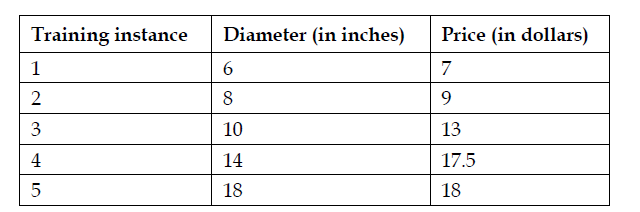

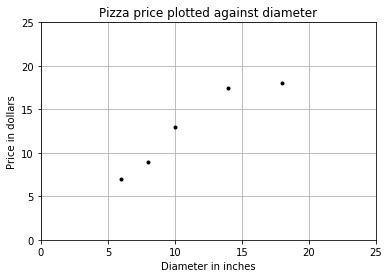

In [2]:
# We can visualize our training data by plotting it on a graph using matplotlib:

import matplotlib.pyplot as plt

X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression
# Training data
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)
print ('A 12" pizza should cost: $%.2f' % model.predict(12)[0])

A 12" pizza should cost: $13.68


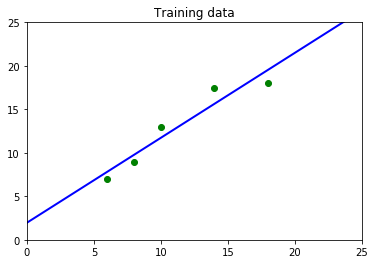

In [86]:
import numpy as np
X=np.arange(25).reshape(25,1)
y_pred = model.predict(X)

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(np.arange(25), y_pred, color='blue', linewidth=2)
plt.title('Training data')
plt.axis([0, 25, 0, 25])
plt.show()

<a id='2'></a>
### [Evaluating the fitness of a model with a cost function](#0)
</br>
Regression lines produced by several sets of parameter values are plotted in the
following figure. How can we assess which parameters produced the best-fitting
regression line?

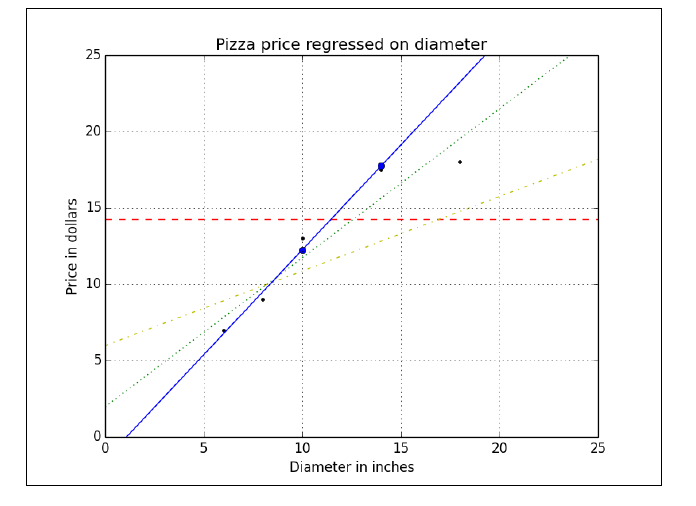

A <font color='blue'> cost function</font>, also called a <font color='blue'>loss function</font>, is used to define and measure the error of a model. The differences between the prices predicted by the model and the observed prices of the pizzas in the training set are called <font color='blue'> residuals</font> or <font color='blue'>training
errors</font>. Later, we will evaluate a model on a separate set of test data; the differences
between the predicted and observed values in the test data are called <font color='blue'>prediction
errors</font> or <font color='blue'>test errors</font>.
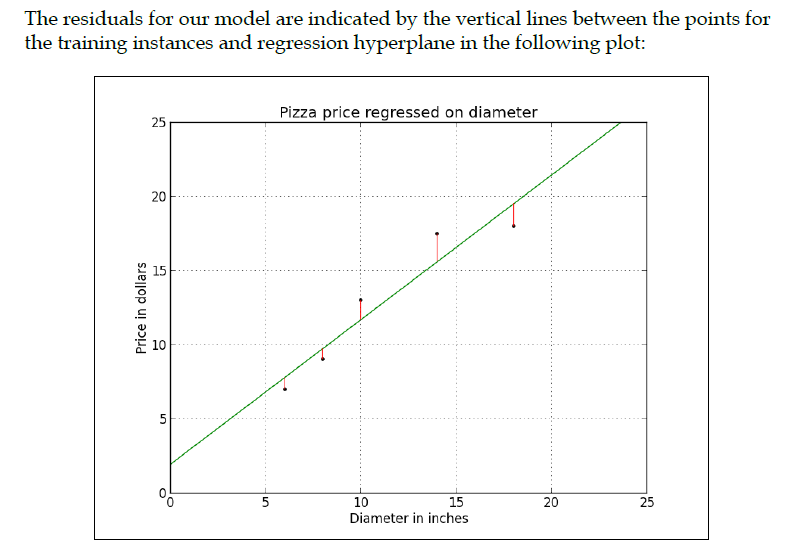

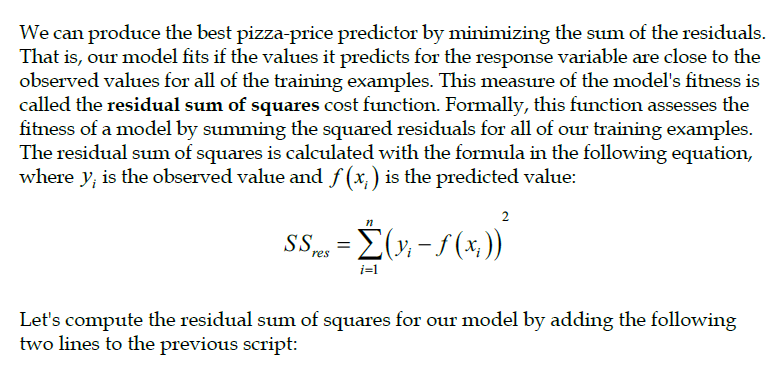

In [51]:
import numpy as np
print('Residual sum of squares: %.2f' % np.mean((model.predict(X_train)- y_train) ** 2))


Residual sum of squares: 1.75


<a id='3'> </a>
### [Solving ordinary least squares for simple linear regression](#0)
</br>
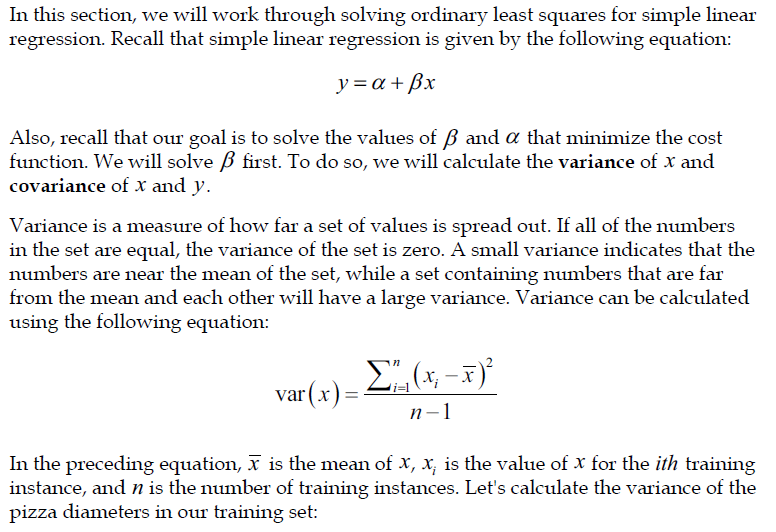

In [46]:
from __future__ import division

xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print ("variance=", variance)

# NumPy also provides the var method to calculate variance. The ddof keyword
# parameter can be used to set Bessel's correction to calculate the sample variance:
import numpy as np
print ("variance=", np.var([6, 8, 10, 14, 18], ddof=1))



variance= 23.2
variance= 23.2


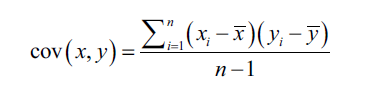

In [2]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 -xbar) * (13 - ybar) + 
       (14 - xbar) * (17.5 - ybar) + (18 - xbar) * (18 - ybar)) /4
print( "cov=", cov)
import numpy as np
print("cov=",np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

cov= 22.65
cov= 22.65


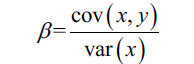

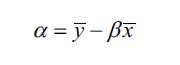

#### Total sum of square
<br\>
## $$SS_{tot}=\sum_{i=0}^{n} (y_i-\bar{y})^2$$

#### Residual sum of square (cost function)
<br\>

## $$SS_{res}=\sum_{i=0}^{n}(y_i -f(y_i)) $$

#### R-squared

## $$R^2=1-\frac{SS_{res}}{S_{tot}} $$



ss_tot =  56.8
ss_res =  19.1980993609
r_sqrt =  0.662005292942


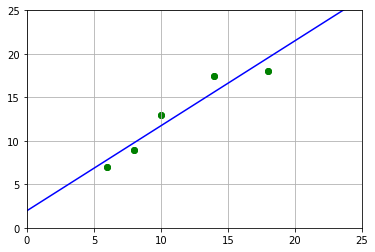

In [122]:
from numpy import newaxis
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]

X_train=np.array(X_train)
y_train=np.array(y_train)

X_mean=X_train.mean()
y_mean=y_train.mean()

result=(X_train-X_mean).T.dot(y_train-y_mean)
cov_1=result/ (len(X_train.tolist())-1)
cov=np.cov(X_train.flatten(), y_train.flatten())

X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

def r_square(X_train, y_train, f):
    ss_tot = (y_train - y_train.mean()).T.dot(y_train - y_train.mean())[0][0]
    print("ss_tot = ", ss_tot)
    ss_res = (y_train- f(X_train)).T.dot(y_train- f(X_train))[0][0]
    print("ss_res = ", ss_res)
    return 1-(ss_res/ss_tot)
    

    
def f_optimal(x):
    cov_xy=cov[0][1]
    var_x=cov[0][0]
    beta=cov_xy/var_x
    alpha=y_mean -beta* X_mean
    return alpha + beta * x

r_sqrt=r_square(np.array(X_test), np.array(y_test), f_optimal)
print("r_sqrt = ", r_sqrt)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train, y_train, color='green')
y_pred=f_optimal(np.arange(25))
y_pred=y_pred[:, newaxis]


plt.scatter(X_train, y_train, color='green')
plt.plot(np.arange(25), y_pred, color='blue')

plt.axis([0,25, 0, 25])
plt.grid(True)
plt.show()


In [121]:
from sklearn.linear_model import LinearRegression
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
print ('R-squared: %.4f' % model.score(X_test, y_test))



R-squared: 0.6620


<a id=4></a>
### [Multiple linear regression](#0)
#### - introduction: [matrix differentiation](files/MatrixCalculus.pdf)
#####  - model : m samples, n featues
 >  ## $$ y_i= \alpha + \beta_1 x_{i1}+ ... + \beta_1 x_{in} + \epsilon_i \quad, for \space i=1,...,m $$
   ## $$ Y= X \beta + \epsilon, \quad  X=\begin{bmatrix}
                                        1 & x_{12} & \ldots  & x_{1n} \\
                                        \vdots &   & & \vdots \\
                                        1 & x_{m2} & \ldots  & x_{mn} \\
                                      \end{bmatrix}  \quad, \beta= \begin{pmatrix} \alpha \\
                                                                          \beta_1\\
                                                                          \vdots\\
                                                                          \beta_n
                                                                                  \end{pmatrix} \quad, \epsilon= \begin{pmatrix}                                                                            \epsilon_1 \\
                                                                          \vdots\\
                                                                          \epsilon_n
                                                                          \end{pmatrix} $$ 
 <br\>
 
 #####  - <font color='red'>cost function (residual sum of squares) </font>:
 ## $$ \sum_{i=0}^{m} (y_i-\hat{y_i})^2 =(Y-X \beta)^T (Y-X\beta)$$
 
 #####  <font color='blue'>minimum </font>:
 ## $$ \frac{\partial }{\partial \beta} [(Y-X \beta)^T (Y-X\beta)]=0 $$
 ## $$  (Y-X \beta)^T (-2X)=0 \implies \beta =(X^TX)^{-1}(X^TY) $$
 

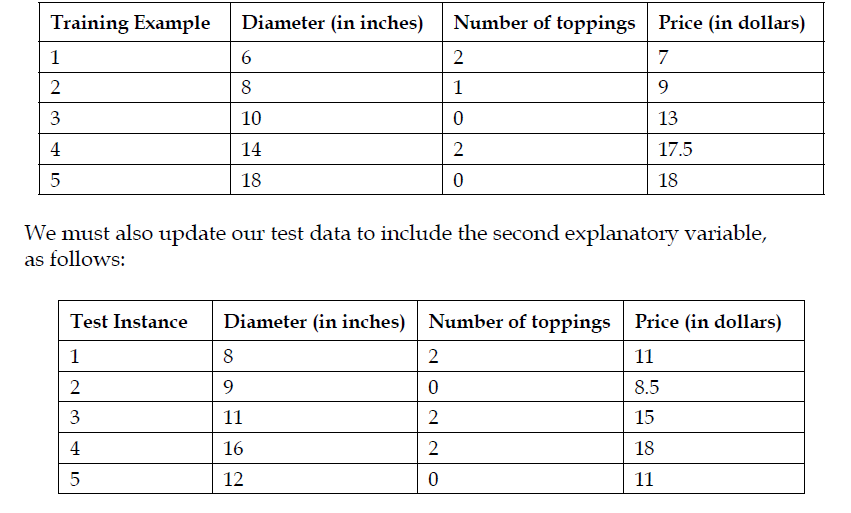

In [130]:
from numpy.linalg import inv
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]

beta=dot(inv(dot(transpose(X), X)), dot(transpose(X), y))
print("beta =", beta)

beta = [[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [134]:
#NumPy also provides a least squares function that can solve the values of the
#parameters more compactly:
from numpy.linalg import lstsq
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(lstsq(X, y)[0])


[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [139]:
from sklearn.linear_model import LinearRegression
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model=LinearRegression()
model.fit(X,y)

X_test = [[1, 8, 2], [1, 9, 0], [1, 11, 2], [1, 16, 2], [1, 12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]

predictions=model.predict(X_test)

for i, prediction in enumerate(predictions):
    print ('Predicted: %s, Target: %s' % (prediction, y_test[i]))

print ('R-squared: %.2f' % model.score(X_test, y_test))




Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]
R-squared: 0.77


<a id='5'></a>
    
## [Polynomial regression](#0)

##### model: quadratic regression, 1 feature

## $$ y_i= \alpha + \beta_1 x_i + \beta_2 x_i^2 \quad, \quad  i=1,..,n$$


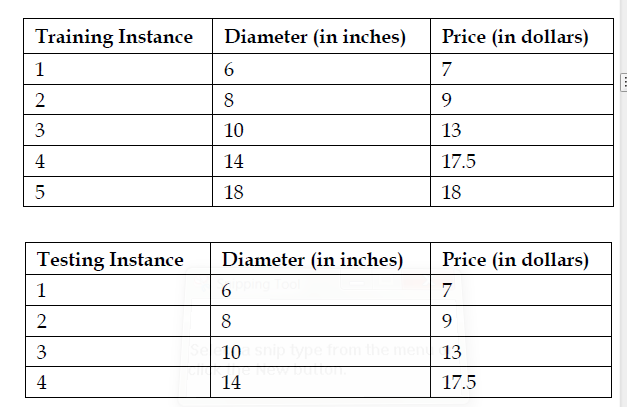

In [161]:
from numpy.linalg import inv
from numpy import dot, transpose

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]


X=np.concatenate((np.power(X_train,0), X_train, np.power(X_train,2)), axis=1)
beta=dot(inv(dot(transpose(X),X)), dot(transpose(X),y))

X_test=np.concatenate((np.power(X_test,0), X_test, np.power(X_test,2)), axis=1)
print(X_test)
y_pred=dot(X_test, beta)

print (y_pred)


[[  1   6  36]
 [  1   8  64]
 [  1  11 121]
 [  1  16 256]]
[[  6.38646055]
 [ 10.0021322 ]
 [ 14.19529584]
 [ 17.90298507]]


[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
[[  6.38646055]
 [ 10.0021322 ]
 [ 14.19529584]
 [ 17.90298507]]


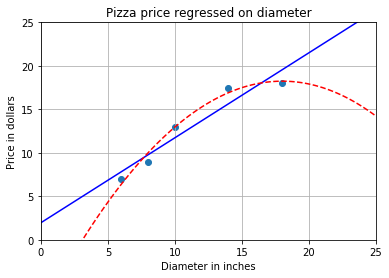

X_train 
 [[6], [8], [10], [14], [18]]
X_train_quadratic 
 [[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
X_test 
 [[6], [8], [11], [16]]
X_test_quadratic 
 [[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
Simple linear regression r-squared 0.809726797708
Quadratic regression r-squared 0.867544365635


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

# linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)

yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy, c='b')

#quadratic regression
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
print(X_test_quadratic)

regressor_quadratic=LinearRegression()

regressor_quadratic.fit(X_train_quadratic, y_train)
print(regressor_quadratic.predict(X_test_quadratic))
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx,regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--' )
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

print ('X_train \n',X_train)
print ('X_train_quadratic \n', X_train_quadratic)
print ('X_test \n',X_test)
print ('X_test_quadratic \n', X_test_quadratic)
print ('Simple linear regression r-squared', regressor.score(X_test, y_test))
print ('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))



<a id='6'></a>

### [Regularization](#0)
#### - Ridge regression (L2 norm)

## $$ RSS_{ridge}= \sum_{i=0}^{n} (y_i -x_i^T  \beta)^2 + \lambda  \sum_{i=0}^{p} \beta_i^2$$

#### - Lasso regression (L1 norm)
## $$ RSS_{lasso}= \sum_{i=0}^{n} (y_i -x_i^T  \beta)^2 + \lambda  \sum_{i=0}^{p} \beta_i$$

$\lambda$ is the hyperparameter of the model and need to be set manually. When $\lambda=0$ the model is equalivant to a linear regression

<a id='7'></a>
### [Applying linear regression](#0)

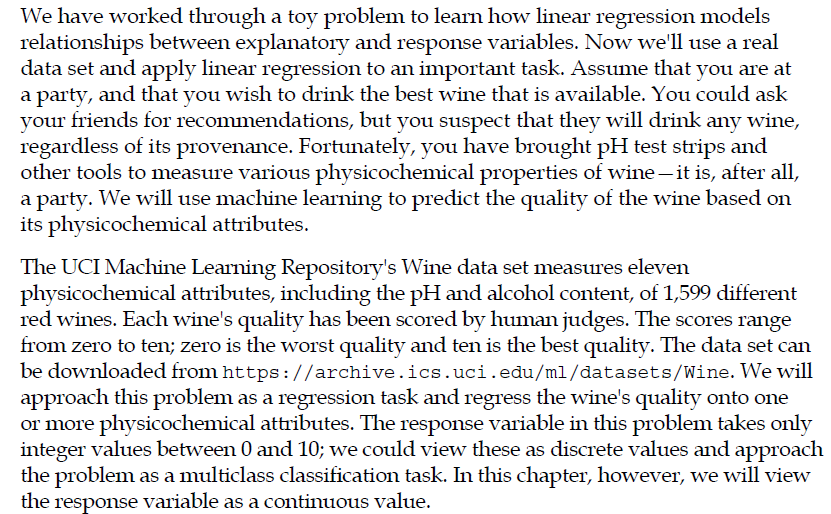

In [26]:
import pandas as pd
#pd.option_context('display.max_rows', -1, 'display.max_columns', 100)
#pd.set_option('display.expand_frame_repr', False)
df=pd.read_csv('winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


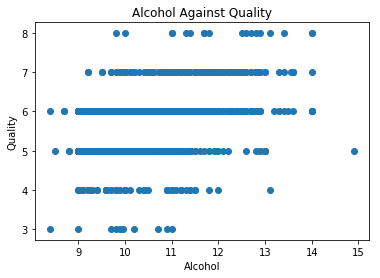

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

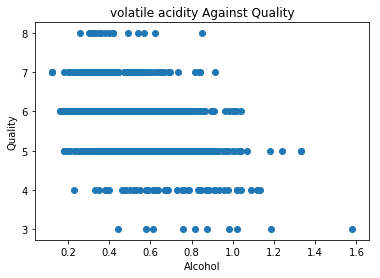

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('volatile acidity Against Quality')
plt.show()

In [32]:
corr=df.corr()

In [82]:
#order all the values of the correlations
index=[(x,y) for x in corr.columns for y in corr.columns ]
values=[corr.loc[i[0],i[1]] for i in index]
s=pd.Series(values, index=index)
s.sort_values(ascending=False)




(quality, quality)                              1.000000
(alcohol, alcohol)                              1.000000
(volatile acidity, volatile acidity)            1.000000
(citric acid, citric acid)                      1.000000
(residual sugar, residual sugar)                1.000000
(chlorides, chlorides)                          1.000000
(free sulfur dioxide, free sulfur dioxide)      1.000000
(total sulfur dioxide, total sulfur dioxide)    1.000000
(density, density)                              1.000000
(pH, pH)                                        1.000000
(sulphates, sulphates)                          1.000000
(fixed acidity, fixed acidity)                  1.000000
(citric acid, fixed acidity)                    0.671703
(fixed acidity, citric acid)                    0.671703
(fixed acidity, density)                        0.668047
(density, fixed acidity)                        0.668047
(free sulfur dioxide, total sulfur dioxide)     0.667666
(total sulfur dioxide, free sul

<a id='8'> </a>
### [Fitting and evaluating the model](#0)

In [116]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split

df=pd.read_csv('winequality-red.csv', sep=';')
X=df[list(df.columns)[:-1]]
y=df['quality']

X_train, X_test, y_train, y_test=train_test_split(X,y)
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_predictions=regressor.predict(X_test)

print('R-squared:', regressor.score(X_test, y_test))


R-squared: 0.338582624404


#### We can use cross validation to assess better the performance of the model

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
import pandas as pd
import matplotlib.pylab as plt


df=pd.read_csv('winequality-red.csv', sep=';')
X=df[list(df.columns)[:-1]]
y=df['quality']

regressor=LinearRegression()
scores =cross_val_score(regressor, X,y, cv=5)
print(scores.mean(), scores)


0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


<a id='9'> </a>
### [Fitting models with gradient descent](#0)

In the examples in this chapter, we analytically solved the values of the model's
parameters that minimize the cost function with the following equation:

## $$ \beta = (X^T X)^{-1} X^T Y $$

#### gradient descent
- Batch
- Stochastic



In [131]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

data=load_boston()

X_train, X_test, y_train, y_test=train_test_split(data.data, data.target.reshape(data.target.shape[0],1))
X_scaler=StandardScaler()
y_scaler=StandardScaler()

X_train=X_scaler.fit_transform(X_train)
y_train=y_scaler.fit_transform(y_train)

X_test=X_scaler.transform(X_test)
y_test=y_scaler.transform(y_test)

regressor=SGDRegressor(loss='squared_loss')
scores=cross_val_score(regressor, X_train, y_train)

print ('Cross validation r-squared scores:', scores)
print ('Average cross validation r-squared score:', np.mean(scores))
regressor.fit(X_train, y_train)
print ('Test set r-squared score', regressor.score(X_test, y_test))




Cross validation r-squared scores: [ 0.69770544  0.49627847  0.78122631]
Average cross validation r-squared score: 0.658403408752
Test set r-squared score 0.724632090071


C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_mod

<a id='ch3'> </a>
## [3. Feature extraction and preprocessing](#0)

<a id='3.1'></a>
### [Extracting features from categorical variables](#0)

Many machine learning problems have categorical, or nominal, rather than
continuous features. For example, an application that predicts a job's salary based on
its description might use categorical features such as the job's location. Categorical
variables are commonly encoded using one-of-K or <font color='red'>one-hot encoding </font>, in which the
explanatory variable is encoded using one binary feature for each of the variable's
possible values.
<br/> <br/>

For example, let's assume that our model has a city explanatory variable that
can take one of three values: New York, San Francisco, or Chapel Hill. One-hot
encoding represents this explanatory variable using one binary feature for each
of the three possible cities.

In [135]:
from sklearn.feature_extraction import DictVectorizer

onehot_encoder=DictVectorizer()
instances=[
    {'city': 'New York'},
    {'city': 'San Francisco'},
    {'city': 'Chapel Hill'}
]
print(onehot_encoder.fit_transform(instances).toarray())


[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


<a id='3.2'></a>
### [Extracting features from text](#0)

#### The bags or words representation

The most common representation of text is the bag-of-words model. This
representation uses a multiset, or bag, that encodes the words that appear in a text; the
bag-of-words does not encode any of the text's syntax, ignores the order of words, and
disregards all grammar. Bag-of-words can be thought of as an extension to one-hot
encoding. It creates one feature for each word of interest in the text. The bag-of-words
model is motivated by the intuition that documents containing similar words often
have similar meanings. The bag-of-words model can be used effectively for document
classification and retrieval despite the limited information that it encodes

In [136]:
#A collection of documents is called a corpus. Let's use a corpus with the following
#two documents to examine the bag-of-words model:
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game'
]


In [139]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=[
    'UNC played Duke in basketball',
    'Duke lost the basketball game',
    'I ate a sandwich'
]
vectorizer=CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwich': 7}


#### [Euclidean distance, L2 norm](#3.2)

## $$ d=\left \lVert x_0 - x_1 \right \rVert $$
## $$ \left \lVert x  \right \rVert =\sqrt{x_1^2 + \ldots+ x_n^2} $$


In [158]:
from sklearn.metrics.pairwise import euclidean_distances
counts=[[0, 1, 1, 0, 0, 1, 0, 1],
        [0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0]
       ]
x_0=np.array(counts[0]).reshape(1,-1)
x_1=np.array(counts[1]).reshape(1,-1)
x_2=np.array(counts[2]).reshape(1,-1)

print('Distance between 1st and 2nd documents:', euclidean_distances(x_0,x_1))
print('Distance between 1st and 3rd documents:', euclidean_distances(x_0,x_2))
print('Distance between 2nd and 3rd documents:', euclidean_distances(x_1,x_2))



[[0 1 1 0 0 1 0 1]]
Distance between 1st and 2nd documents: [[ 2.]]
Distance between 1st and 3rd documents: [[ 2.44948974]]
Distance between 2nd and 3rd documents: [[ 2.44948974]]


#### [Stop word filtering](#3.2)

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game',
    'I ate a sandwich'
]
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)



[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwich': 6}


#### [Stemming and lemmatization](#3.2)

While stop filtering is an easy strategy for dimensionality reduction, most stop
lists contain only a few hundred words. A large corpus may still have hundreds of
thousands of unique words after filtering. Two similar strategies for further reducing
dimensionality are called <font color='red'>stemming </font> and <font color='red'>lemmatization </font>. <br>
A high-dimensional document vector may separately encode several derived or
inflected forms of the same word. For example, jumping and jumps are both forms
of the word jump; a document vector in a corpus of long-jumping articles may
encode each inflected form with a separate element in the feature vector. Stemming
and lemmatization are two strategies to condense inflected and derived forms of a
word into a single feature.


In [160]:
import nltk

In [162]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print (stemmer.stem('gathering'))

#Now let's lemmatize our toy corpus:
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
wordnet_tags = ['n', 'v']

corpus = [
'He ate the sandwiches',
'Every sandwich was eaten by him'
]

stemmer = PorterStemmer()
print ('Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])
def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print('Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus])


gather
Stemmed: [['He', 'ate', 'the', 'sandwich'], ['everi', 'sandwich', 'wa', 'eaten', 'by', 'him']]
Lemmatized: [['He', 'eat', 'the', 'sandwich'], ['Every', 'sandwich', 'be', 'eat', 'by', 'him']]


#### [Extendgin bag-of-words with TF-IDF weights](#3.2)

- term frequency: $tf$
- inverse document frequency: 
## $$ idf=\ln \frac{d+1}{ 1 + \left | \{d \in D: t \in d \}\right |}$$
## $$ tf\_idf = tf * idf$$

### example:
    CountVectorizerrpus = [
      'The dog ate a sandwich and I ate a sandwich', 
      'The wizard transfigured a sandwich'
    ]

    [[2 1 2 0 0]
     [0 0 1 1 1]]
    {'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}
    [[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
     [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]
 
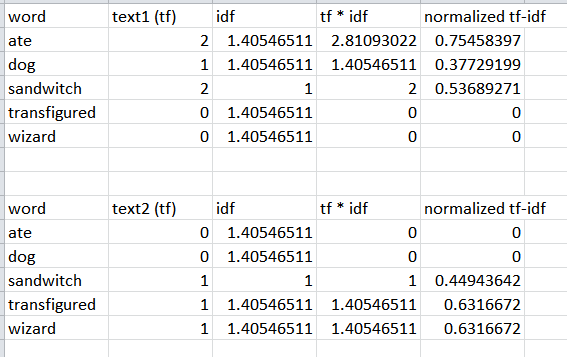

In [366]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

CountVectorizerrpus = [
'The dog ate a sandwich and I ate a sandwich',
'The wizard transfigured a sandwich'
 ]
vectorizer_2 = CountVectorizer(stop_words='english')
print(vectorizer_2.fit_transform(corpus).todense())
print(vectorizer_2.vocabulary_)

vectorizer = TfidfVectorizer(stop_words='english')
print ("vectorizer.fit_transform\n",vectorizer.fit_transform(corpus).todense())

print("\nvocabulary \n", vectorizer.vocabulary_)
print("\nvectorizer.idf_ (idf diagonal matrix)\n ", vectorizer.idf_)

test_doc=['dog is transfigured ate']
print("tst_doc \n", vectorizer.transform(test_doc).todense())

[[2 1 2 0 0]
 [0 0 1 1 1]]
{'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}
vectorizer.fit_transform
 [[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]

vocabulary 
 {'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}

vectorizer.idf_ (idf diagonal matrix)
  [ 1.40546511  1.40546511  1.          1.40546511  1.40546511]
tst_doc 
 [[ 0.57735027  0.57735027  0.          0.57735027  0.        ]]


In [352]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
corpus = ["The dog ate a sandwich and I ate a sandwich",
          "The wizard transfigured a sandwich"]
vectorizer = TfidfVectorizer(stop_words='english')
tfidfs = vectorizer.fit_transform(corpus)

freq_term_matrix=vectorizer_2.fit_transform(corpus).todense()
print("freq_term_matrix \n",freq_term_matrix )

tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
print ("IDF:", tfidf.idf_)

from collections import Counter
import pandas as pd

columns = [k for (v, k) in sorted((v, k)
           for k, v in vectorizer.vocabulary_.items())]
tfidfs = pd.DataFrame(tfidfs.todense(),
                      columns=columns)
#     ate   dog  sandwich  transfigured  wizard 
#0   0.75  0.38      0.54          0.00    0.00
#1   0.00  0.00      0.45          0.63    0.63

print("vectorizer.idf_", vectorizer.idf_)
df = (1 / pd.DataFrame([vectorizer.idf_], columns=columns))
#     ate   dog  sandwich  transfigured  wizard
#0   0.71  0.71       1.0          0.71    0.71
corp = [txt.lower().split() for txt in corpus]
corp = [[w for w in d if w in vectorizer.vocabulary_] for d in corp]
tfs = pd.DataFrame([Counter(d) for d in corp]).fillna(0).astype(int)
#    ate  dog  sandwich  transfigured  wizard
#0    2    1         2             0       0
#1    0    0         1             1       1

# The first document's TFIDF vector:
tfidf0 = tfs.iloc[0] * (1. / df)
print("tfidf0 \n", tfidf0)

print("pd.np.linalg.norm(tfidf0) \n", pd.np.linalg.norm(tfidf0))


tfidf0 = tfidf0 / pd.np.linalg.norm(tfidf0)
print("tfidf0 /n", tfidf0)
#        ate       dog  sandwich  transfigured  wizard
#0  0.754584  0.377292  0.536893           0.0     0.0

tfidf1 = tfs.iloc[1] * (1. / df)
tfidf1 = tfidf1 / pd.np.linalg.norm(tfidf1)
print("tfidf0 /n", tfidf1)
#    ate  dog  sandwich  transfigured    wizard
#0   0.0  0.0  0.449436      0.631667  0.631667

print(pd.np.linalg.norm(tfidf1))

freq_term_matrix 
 [[2 1 2 0 0]
 [0 0 1 1 1]]
IDF: [ 1.40546511  1.40546511  1.          1.40546511  1.40546511]
vectorizer.idf_ [ 1.40546511  1.40546511  1.          1.40546511  1.40546511]
tfidf0 
        ate       dog  sandwich  transfigured  wizard
0  2.81093  1.405465       2.0           0.0     0.0
pd.np.linalg.norm(tfidf0) 
 3.72513903775
tfidf0 /n         ate       dog  sandwich  transfigured  wizard
0  0.754584  0.377292  0.536893           0.0     0.0
tfidf0 /n    ate  dog  sandwich  transfigured    wizard
0  0.0  0.0  0.449436      0.631667  0.631667
1.0


<a id='ch4'></a>
## [4. Logistic regression](#0)

Unlike the models we discussed previously, logistic regression is used for classification
tasks. Recall that the goal in classification tasks is to find a function that maps an
observation to its associated class or label. A learning algorithm must use pairs of
feature vectors and their corresponding labels to induce the values of the mapping
function's parameters that produce the best classifier, as measured by a particular
performance metric. In binary classification, the classifier must assign instances to one
of the two classes. Examples of binary classification include predicting whether or not
a patient has a particular disease, whether or not an audio sample contains human
speech, or whether or not the Duke men's basketball team will lose in the first round
of the NCAA tournament. In multiclass classification, the classifier must assign one
of several labels to each instance. In multilabel classification, the classifier must assign
a subset of the labels to each instance. In this chapter, we will work through several
classification problems using logistic regression, discuss performance measures for the
classification task, and apply some of the feature extraction techniques you learned in
the previous chapter.








<a id='4.1'></a>
### [Binary classification](#0)

### logistic function:
## $$ F(t)=\frac{1}{1+ e^{-t}} $$

[real example](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)


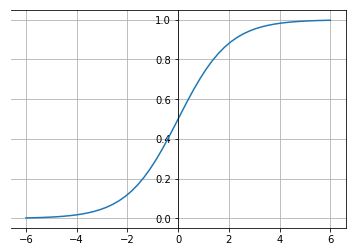

In [260]:
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return 1/(1+np.exp(-t))
xx=np.linspace(-6,6,50)

y=f(xx)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')


ax.grid(True)

#ax2 = fig.add_subplot(2, 2, 2)
#ax2.grid(True)
ax.plot(xx,y)
#ax2.plot(xx,y)

plt.show()

<a id='4.2'></a>
### [Spam filtering](#ch4)

In [355]:
import pandas as pd
df=pd.read_csv('SMSSpamCollection', delimiter='\t', header=None)
print('number os spam message=',df[df[0]=='spam'][0].count())
print('number os ham message=',df[df[0]=='ham'][0].count())
df.head()

number os spam message= 747
number os ham message= 4825


,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
df=pd.read_csv('SMSSpamCollection', sep='\t', header=None)

df.head()

X_train_raw, X_test_raw, y_train, y_test=train_test_split(df[1],df[0], shuffle=False)


vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("classes= \n", classifier.classes_)
test_v=vectorizer.transform([X_test_raw.iloc[5]])
#coefficients=zip(np.arange(len(vectorizer.vocabulary_)), np.transpose(classifier.coef_))
#df_coef=pd.DataFrame(list(coefficients))

print(X_test_raw.iloc[5])
print(test_v)
print(classifier.classes_, classifier.predict_proba(test_v))

product= classifier.intercept_[0]+classifier.coef_[0][6115]*0.426197348751+classifier.coef_[0][4270]*0.552958322082 +classifier.coef_[0][4020]*0.373961237338 +classifier.coef_[0][3895]*0.451674560618 +classifier.coef_[0][3509]*0.27224456321 +classifier.coef_[0][1547]*0.30760184658
print ("manually cross check the result: F(t)=", 1.0/(1.0+np.exp(-product)))
    
for i, prediction in enumerate(predictions[:5]):
    print ('Prediction: %s. Message: %s' % (prediction, X_test_raw.iloc[i]))
    

classes= 
 ['ham' 'spam']
Sorry, I'll call later in meeting
  (0, 6115)	0.426197348751
  (0, 4270)	0.552958322082
  (0, 4020)	0.373961237338
  (0, 3895)	0.451674560618
  (0, 3509)	0.27224456321
  (0, 1547)	0.30760184658
['ham' 'spam'] [[ 0.97057746  0.02942254]]
manually cross check the result: F(t)= 0.029422538201
Prediction: ham. Message: Two teams waiting for some players
Prediction: ham. Message: Can ü send me a copy of da report?
Prediction: ham. Message: swhrt how u dey,hope ur ok, tot about u 2day.love n miss.take care.
Prediction: ham. Message: Ok da, i already planned. I wil pick you.
Prediction: spam. Message: Urgent! Please call 0906346330. Your ABTA complimentary 4* Spanish Holiday or £10,000 cash await collection SAE T&Cs BOX 47 PO19 2EZ 150ppm 18+


### Confusion matrix

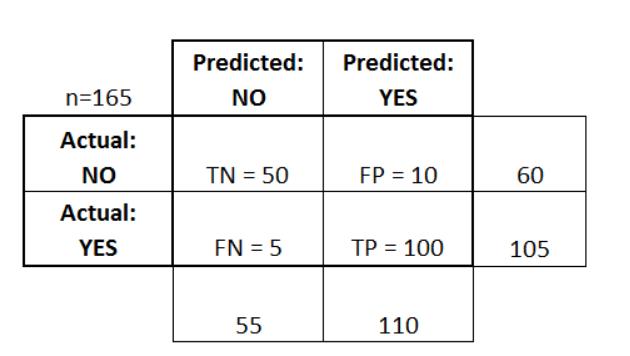


<br>

|              | predicted False | predicted True |
|--------------|-----------------|----------------|
| Actual False | 50              | 10             |
| Acttual True | 5               | 100            |




- There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
- The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
- Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
- In reality, 105 patients in the sample have the disease, and 60 patients do not.



<font color='blue'>true positives </font>(TP): These are cases in which we predicted yes (they have the disease), and they do have the disease. <br>
<font color='blue'>true negatives</font> (TN): We predicted no, and they don't have the disease. <br>
<font color='red'> false positives</font> (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")<br>
<font color='red'> false negatives </font> (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")
I've added these terms to the confusion matrix, and also added the row and column totals:

### Definition

* **Accuracy**: Overall, how often is the classifier correct? (100+50)/165 = 0.91 <br>

$$\frac{TP+TN}{total} $$

* **Misclassification Rate**: Overall, how often is it wrong?  (10+5)/165 = 0.09. equivalent to 1 minus Accuracy also known as "Error Rate" <br>

$$\frac{FP+FN}{total}$$  

* **True Positive Rate**: When it's actually yes, how often does it predict yes? 100/105 = 0.95. Also known as "Sensitivity" or **"Recall"**  <br>

$$\frac{TP}{actual \, yes} $$

* **False Positive Rate**: When it's actually no, how often does it predict yes?10/60 = 0.17 <br>

    $$\frac{FP}{actual \, no} $$
    
* **Specificity**: When it's actually no, how often does it predict no? 50/60 = 0.83. Equivalent to 1 minus False Positive Rate <br>

    $$\frac{TN}{actual \, no} $$
    
* **Precision**: When it predicts yes, how often is it correct? 100/110 = 0.91 <br>

$$\frac{TP}{predicted \, yes}  $$

* **Prevalence**: How often does the yes condition actually occur in our sample? 105/165 = 0.64 <br>

$$ \frac{actual \, yes}{total}$$

A couple other terms are also worth mentioning:
<br/>
* **Positive Predictive Value**: This is very similar to precision, except that it takes prevalence into account. In the case where the classes are perfectly balanced (meaning the prevalence is 50%), the positive predictive value (PPV) is equivalent to precision. (More details about PPV.)
* **Null Error Rate**: This is how often you would be wrong if you always predicted the majority class. (In our example, the null error rate would be 60/165=0.36 because if you always predicted yes, you would only be wrong for the 60 "no" cases.) This can be a useful baseline metric to compare your classifier against. However, the best classifier for a particular application will sometimes have a higher error rate than the null error rate, as demonstrated by the Accuracy Paradox.
* **Cohen's Kappa**: This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate. (More details about Cohen's Kappa.)
* **F Score**: This is a weighted average of the true positive rate (recall) and precision. (More details about the F Score.)
## $$ F\_Score=\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$$

> "The F1 measure penalizes classifiers with imbalanced precision and recall scores,
like the trivial classifier that always predicts the positive class. A model with perfect
precision and recall scores will achieve an F1 score of one. A model with a perfect
precision score and a recall score of zero will achieve an F1 score of zero."

* **ROC Curve**: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. (More details about ROC Curves.)

[example](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

In [48]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

df=pd.read_csv('sms.csv')
df.head()
X_train_raw, X_test_raw, y_train, y_test= train_test_split(df['message'], df['label'], shuffle=False)
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train_raw)
X_test=vectorizer.transform(X_test_raw)
classifier =LogisticRegression()
classifier.fit(X_train, y_train)

def explicit_calculation(y, predictions):
    true_positive_train=np.bitwise_and(y,predictions).sum()
    predicted_true_train=predictions.sum()
    actual_true_train=y.sum()
    precision_manual= float(true_positive_train) /predicted_true_train
    recall_manual=float(true_positive_train)/actual_true_train
    
    F_score=2 *(1/ (1/precision_manual + 1 /recall_manual))
    return precision_manual, recall_manual, F_score

predictions_train=classifier.predict(X_train)
precision_manual_train, recall_manual_train, F_score_train=explicit_calculation(y_train, predictions_train)
print("precision manual train \n", precision_manual_train)
print("recall manual train \n", recall_manual_train)
print("F-Score manual train \n", F_score_train)

predictions_test=classifier.predict(X_test)
precision_manual_test, recall_manual_test, F_score_test=explicit_calculation(y_test, predictions_test)
f_score_test=2 *(1/ (1/precision_manual_test + 1 /recall_manual_test))
print("precision manual test \n", precision_manual_test)
print("recall manual test \n", recall_manual_test)
print("F-Score manual test \n", F_score_test)

precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recalls', np.mean(recalls), recalls)


f1s = cross_val_score(classifier, X_train, y_train, cv=5,scoring='f1')
print('F1', np.mean(f1s), f1s)



precision manual train 
 0.995717344754
recall manual train 
 0.823008849558
F-Score manual train 
 0.901162790698
precision manual test 
 0.986111111111
recall manual test 
 0.78021978022
F-Score manual test 
 0.871165644172
Precision 0.992464325798 [ 0.97530864  1.          1.          1.          0.98701299]
Recalls 0.679646017699 [ 0.69911504  0.61061947  0.69911504  0.71681416  0.67256637]
F1 0.806128592198 [ 0.81443299  0.75824176  0.82291667  0.83505155  0.8       ]


<a id='roc'></a>

## [ROC (Receveir operating characteristic)](#0)

ROC curves plot the classifier's recall against its fall-out. Fall-out, or the false positive
rate.

* **True positive rate**:
## $$ TPR=\frac{TP}{Actual\, True}$$

* **False positive rate (fall-out)**:
## $$ TPR=\frac{FP}{Actual\, False}$$

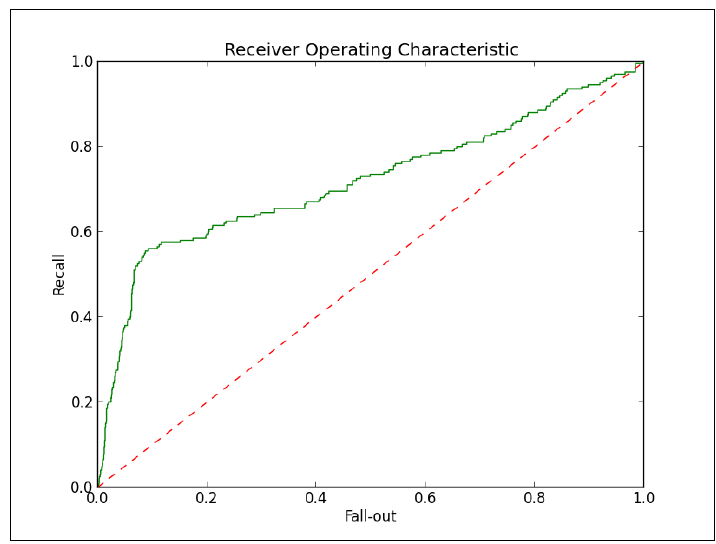

classes:
 [0 1]
classes:  [0 1]  predictions:
 [[ 0.97001276  0.02998724]
 [ 0.96255682  0.03744318]
 [ 0.98160499  0.01839501]
 ..., 
 [ 0.97181374  0.02818626]
 [ 0.92680242  0.07319758]
 [ 0.92454655  0.07545345]]
false_positive_rate:
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   8.25082508e-04   8.25082508e-04
   8.25082508e-04   8.25082508e-04   8.25082508e-04   8.25082508e-04
   1.65016502e-03   1.65016502e-03   1.65016502e-03   2.47524752e-03
   2.47524752e-03   3.30033003e-03   3.30033003e-03   4.12541254e-03
   4.12541254e-03   4.95049505e-03   4.95049505e-03   5.77557756e-03
   5.77557756e-03   6.60066007e-03   6.60066007e-03   8.25082508e-03
   8.25082508e-03   1.32013201e-02   1.32013201e-02   1.40264026e-02
   1.40264026e-02   1.73267327e-02   1.73267327e-02   2.39273927e-02
  

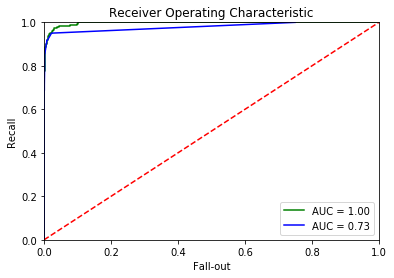

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], shuffle=False)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)

X_test = vectorizer.transform(X_test_raw)
TfidfVectorizer??
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict_proba(X_test)

print("classes:\n", classifier.classes_)
print("classes: ", classifier.classes_, " predictions:\n", predictions)
false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:, 1])

print("false_positive_rate:\n", false_positive_rate)
print("recall:\n", recall)
print("thresholds:\n", thresholds)

def prediction_calculated(predictions_prob, threshold):
    prediction_list=[]
    for i  in range(predictions_prob.shape[0]):
        if predictions_prob[i][0]>threshold:
            prediction_list.append(0)
        else: 
            prediction_list.append(1)
    return np.array(prediction_list)
  
def roc2(predictions_prob, thresholds):
    false_positive_rate_list=[]
    recall_list=[]
    actual_false=np.bitwise_not(y_test).sum()
    actual_true=y_test.sum() # TP/(Actual yes)
    actual_false=np.where(y_test==0,1,0).sum()
    for t in range(thresholds.shape[0]):
        threshold=thresholds[t]
        predictions_cal=prediction_calculated(predictions_prob, threshold)
        TP=np.bitwise_and(predictions_cal,y_test).sum()
        FP= np.bitwise_and(predictions_cal, np.where(y_test==0,1,0)).sum()
        TPR= float(TP)/actual_true
        FPR=  float(FP)/actual_false
        false_positive_rate_list.append(FPR)
        recall_list.append(TPR)
    false_positive_rate=np.array(false_positive_rate_list)
    recall=np.array(recall_list)
    return false_positive_rate, recall, thresholds

false_positive_rate2, recall2, thresholds2=roc2(predictions,thresholds)

roc_auc = auc(false_positive_rate, recall)
roc_auc2 = auc(false_positive_rate2, recall2)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'g', label='AUC = %0.2f' %roc_auc)
plt.plot(false_positive_rate2, recall2, 'b', label='AUC = %0.2f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


In [93]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total
%prun sum_of_lists(1000000)


In [94]:
%load_ext line_profiler

In [95]:
%lprun -f sum_of_lists sum_of_lists(5000)

In [96]:
%load_ext memory_profiler

In [97]:
%memit sum_of_lists(1000000)

peak memory: 214.13 MiB, increment: 70.72 MiB


In [99]:
%%file mprun_demo.py
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

Writing mprun_demo.py


In [100]:
from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(1000000)